## PHYS 249 Assignment #7:  Linear Equations & Eigenvectors

(See units 13-15)

**1)** Use ${\tt solve()}$ to solve a set of linear equations:

1.0x + 2.0y + z − 3 = 0

2.0x − 1.0y − 2 = 0

0.5x + 1.0y − 2.0z − 1 = 0

**a)** Do this using ${\tt numpy}$ arrays. Make sure to check (in Python) that the solution is correct.

In [41]:
#add to the code below
from numpy import array
from numpy.linalg import solve
from numpy import dot
eq1 = lambda x,y,z : x + 2*y + z - 3
eq2 = lambda x,y,z : 2*x - y  - 2
eq3 = lambda x,y,z : 0.5*x + y - 2*z - 1

A = array([[1,2,1], [2,-1,0], [0.5, 1, -2]])
B = array([3, 2, 1])

res = solve(A, B)
print(res)
# checking if correct
print(dot(A, res))
x,y,z = res 
print(eq1(x, y, z))
print(eq2(x, y, z))
print(eq3(x, y, z))


[1.36 0.72 0.2 ]
[3. 2. 1.]
0.0
-2.220446049250313e-16
-1.1102230246251565e-16


**b)** Now do the same thing using the ${\tt matrix}$ class in the ${\tt numpy}$ module ${\tt linalg}$. As before, check the solution is correct.

In [42]:
#add to the code below
from numpy.linalg import solve
from numpy import dot
from numpy import mat
C = mat([[1,2,1], [2,-1,0], [0.5, 1, -2]])
D = array([3,2,1])

res2 = solve(C,D)
print(res2)

# checking if correct
print(dot(C, res2) - D)


[1.36 0.72 0.2 ]
[[ 0.00000000e+00 -2.22044605e-16 -1.11022302e-16]]


**c)** What are the eigenvalues and eigenvectors of the matrix in this problem? Are the eigenvalues real numbers, and/or distinct? [Hint: look up the format of the return values for ${\tt eig()}$ in Python, complex numbers have a second component with a 'j', so if you see a j, the value is not real.]

In [43]:
from numpy import linalg as la 
# la.eig(C)
eigvals, eigvects = la.eig(A)
print(eigvals)
for i in range(3):
    print(eigvects[:, i])


# The eigen values are all distinct, with only one of them being real, the other two being a complex conjugate pair

[ 2.41653324+0.j        -2.20826662+0.5442958j -2.20826662-0.5442958j]
[0.84422736+0.j 0.49420117+0.j 0.20747378+0.j]
[-0.09593819-0.37517014j -0.10054244+0.57571354j  0.71308371+0.j        ]
[-0.09593819+0.37517014j -0.10054244-0.57571354j  0.71308371-0.j        ]


**2)** The code below makes a random, 2D, ellipsoidal distribution of points, then rotates it by some angle and plots it. 

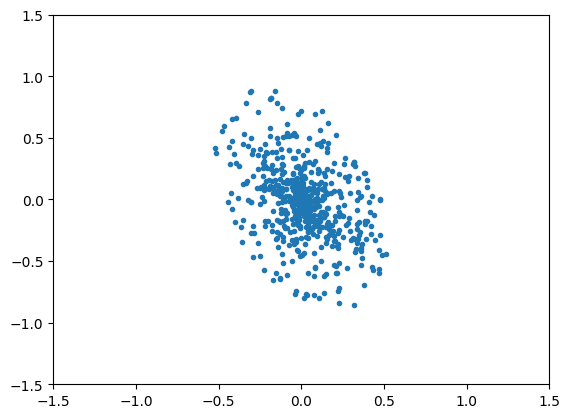

In [44]:
from numpy import array, zeros, mean, sqrt, outer
from numpy.linalg import eigh
from pylab import plot, show, arrow, axes, ylim, xlim
from random import random
from math import cos, sin, pi, tanh, atan, tan, sqrt

# array of 10 points with x,y

N = 600
x = zeros(N, float)
y = zeros(N, float)

r = 0.0
th = 0.0

a = 0.3
b = 0.6
#make ellipsoidal distribution
for i in range(N):
    #r = (random())**0.5
    r = tan(random())
    th = random()*2.0*pi
    x[i] = a*r*cos(th)
    y[i] = b*r*sin(th)

#now rotate
theta = 0.3
for i in range(N):
    x[i], y[i] = cos(theta)*x[i] - sin(theta)*y[i], sin(theta)*x[i] + cos(theta)*y[i]


plot(x,y, marker='.', ls='',zorder=1)
ylim(-1*1.5,1*1.5)
xlim(-1*1.5,1*1.5)
show()


**a)** Which variables control the lengths of the two axes of the distribution, and which controls its orientation angle?

a, b control axes of distribution and theta controls orientation angle. the random variable r has an effect on how far each point gets distributed, but a and b are what control the general axes.

**b)** Now calculate the *moment of inertia tensor* for the the system, the matrix *M* with elements

$$ M_{ab} = \sum_i (w_{a,i} - \bar{w}_{a,i})*(w_{b,i} - \bar{w}_{b,i})$$

where $w_a$ for $a=0,1,2$ are the coordinates x,y,z, i goes from 0 to N-1 (i.e. over all particles), and $\bar{x}$ indicates the mean value. Thus for instance the element $M_{02}$ would be:

$$ M_{02} = \sum_i (w_{0,i} - \bar{w}_{0,i})*(w_{2,i} - \bar{w}_{2,i}) = \sum_i (x_i - \bar{x}_i)*(z_i - \bar{z}_i) \,.$$

Print the matrix $M$.

(Note you can use the function *mean()* to get the mean.)


In [45]:
# print(x, y)
x_m = mean(x)
y_m = mean(y)
get = [x, y]
means = [x_m, y_m]
M = zeros((2,2))
for i in range(len(x)):
    M[0][0] += (x[i]-x_m)*(x[i] - x_m)
    M[0][1] += (x[i]-x_m)*(y[i] - y_m)
    M[1][0] += (y[i]-y_m)*(x[i] - x_m)
    M[1][1] += (y[i]-y_m)*(y[i] - y_m)

print(M)
# for i in range(2):
#     for j in range(2):
#         sum = 0
#         for k in range(len(x)):
#             sum+=(get[i][k] - means[i])*(get[j][k] - means[j])
#         M[i][j] = sum

# print(M)

[[ 21.22918186 -12.40634337]
 [-12.40634337  54.62307336]]


**c)** Now calculate (and save and print) the eigenvectors and eigenvalues of the matrix. Then using the function *arrow()*, plot the points and the eigenvectors on the same plot. If you scale the eigenvectors by $2 \times \sqrt{\lambda/N}$, where $\lambda$ is the corresponding eigenvalue, you should get a nice plot. What do you conclude is the significance of the eigenvectors and eigenvalues in this case? 

(Note scatter seems to want to plot the points on top of the vectors, obscuring them; you can fix this by using the `zorder' keyword as an extra argument to *arrow* and *scatter*, setting it to 1 for the points and 2 for the arrows.)

Eigen Values:
[17.12455667 58.72769854]
Eigenvectors:
[-0.94938853 -0.31410416] [ 0.31410416 -0.94938853]


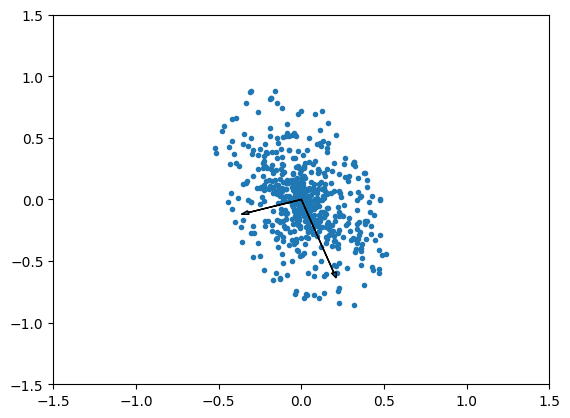

In [46]:
eigvals, eigvects = la.eig(M)
print("Eigen Values:")
print(eigvals)
print("Eigenvectors:")
print(eigvects[:,0], eigvects[:,1])
plot(x,y, marker='.', ls='',zorder=1)
for i in range(len(eigvects)):
    scale = 2 * sqrt(eigvals[i]/N)
    # print(eigvects[i][0], eigvects[i][1])
    # cur = eigvects[:, i]
    arrow(0, 0, eigvects[0][i]*scale, eigvects[1][i]*scale, head_width=0.03)
    # arrow(0,0,eigvects[i,0]*scale, eigvects[i, 1]*scale)
    # arrow(0,0, cur[0], cur[1])
ylim(-1*1.5,1*1.5)
xlim(-1*1.5,1*1.5)
show()